In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generate_data(p = 400, n = 1000, sig_lev = 5, bkg_lev = 200):

  A = np.zeros((p, 1))
  A[0] = np.sqrt(sig_lev)

  B = np.zeros((p, 1))
  B[1] = np.sqrt(bkg_lev)


  epsilon = np.random.normal(0,1, size = (n,p))
  epsilon_2 = np.random.normal(0,1, size = (n,p))

  F = np.random.normal(0,1, size = (n,1))

  L = np.random.normal(0,1, size = (n,1))
  Lplus = np.random.normal(0,1, size = (n,1))

  X = F.dot(A.T) + L.dot(B.T) + epsilon
  Xplus = F.dot(A.T) + Lplus.dot(B.T) + epsilon_2

  S = X.T.dot(X)/n
  Splus = (X.T.dot(Xplus) + Xplus.T.dot(X))/2/n
  Stotal = (X.T.dot(X) + Xplus.T.dot(Xplus))/2/n
  Savg = (X + Xplus).T.dot(X + Xplus)/n/4
  return S, Splus, X.T.dot(Xplus)/n, Stotal, Savg, X, Xplus

def Generalized_eigenvector(A,B):
  eig_mat_B = np.linalg.eig(B)[1] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0]**(-0.5)))
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B_tild, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res

def Generalized_eigenvector_topk(A,B):
  eig_mat_B = np.linalg.eig(B)[1] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0]**(-0.5)))[:,:2]
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B_tild, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res
def Generalized_eigenvector_tops(A,B,s):
  eig_mat_B = np.linalg.eig(B)[1] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0]**(-0.5)))[:,:s]
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B_tild, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res

Truncated PCA vs UnTruncated

In [ ]:
n = 500
asp_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
res = [[0]*5 for _ in range(len(asp_ratio))]


for i in range(len(asp_ratio)):
  p = int(asp_ratio[i]*n)
  sig = np.zeros(p)
  sig[0] = 1
  S, Splus, XXplus,_,_,_,_ = generate_data(p = p, n = n, sig_lev = 10, bkg_lev = 500)

  #vec_xx = np.linalg.eig(S)[1].T[1]
  #vec_cl = np.linalg.eig(Splus)[1].T[:3]
  vec_unif = Generalized_eigenvector(Splus,S).T[0]
  vec_unif_1 = Generalized_eigenvector_topk(Splus,S).T[0]

  #res[i][0] = abs(np.corrcoef(vec_xx, sig)[0][1])
  #res[i][1] = max(abs(np.corrcoef(vec_cl, sig)[-1][:-1]))
  res[i][2] = np.sin(np.arccos(abs(np.corrcoef(vec_unif, sig)[0][1])))
  res[i][3] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_1, sig)[0][1])))
  #res[i][4] = (1 - p/n/10**2)/(1 + p/n/10)

Plot

Plot saved as Untruncated_PCA++_vs._Truncated_PCA++.pdf


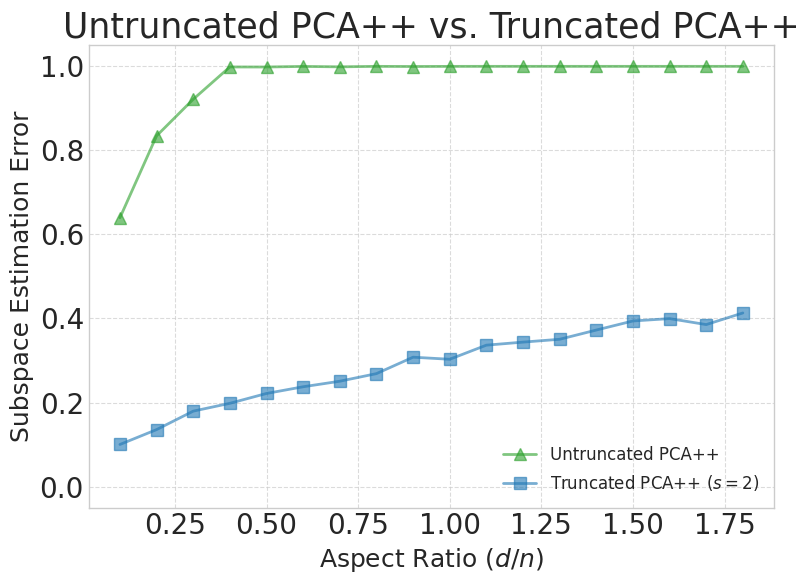

In [ ]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "legend.fontsize": 12,
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()

# Plot "Generalized eigenvalue solution" (Standard GES)
ax.plot(asp_ratio, [res[i][2] for i in range(len(res))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label=r'Untruncated PCA++', alpha=0.6)

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res[i][3] for i in range(len(res))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label=r'Truncated PCA++ ($s=2$)', alpha=0.6) # Or your specific method name

# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Aspect Ratio ($d/n$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'Untruncated PCA++ vs. Truncated PCA++')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='lower right') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "Untruncated_PCA++_vs._Truncated_PCA++.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()

In [ ]:
n = 500
asp_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
res_2 = [[0]*5 for _ in range(len(asp_ratio))]


for i in range(len(asp_ratio)):
  p = int(asp_ratio[i]*n)
  sig = np.zeros(p)
  sig[0] = 1
  S, Splus, XXplus,_,_,_,_ = generate_data(p = p, n = n, sig_lev = 10, bkg_lev = 500)

  #vec_xx = np.linalg.eig(S)[1].T[1]
  #vec_cl = np.linalg.eig(Splus)[1].T[:3]
  #vec_unif = Generalized_eigenvector(Splus,S).T[0]
  vec_unif_1 = Generalized_eigenvector_tops(Splus,S,2).T[0]
  vec_unif_2 = Generalized_eigenvector_tops(Splus,S,int(0.1*p)).T[0]
  vec_unif_3 = Generalized_eigenvector_tops(Splus,S,int(0.2*p)).T[0]
  vec_unif_4 = Generalized_eigenvector_tops(Splus,S,int(0.4*p)).T[0]

  #res[i][0] = abs(np.corrcoef(vec_xx, sig)[0][1])
  #res[i][1] = max(abs(np.corrcoef(vec_cl, sig)[-1][:-1]))
  res_2[i][0] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_1, sig)[0][1])))
  res_2[i][1] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_2, sig)[0][1])))
  res_2[i][2] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_3, sig)[0][1])))
  res_2[i][3] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_4, sig)[0][1])))
  #res[i][4] = (1 - p/n/10**2)/(1 + p/n/10)

Plot saved as Truncated_PCA++_diff_s.pdf


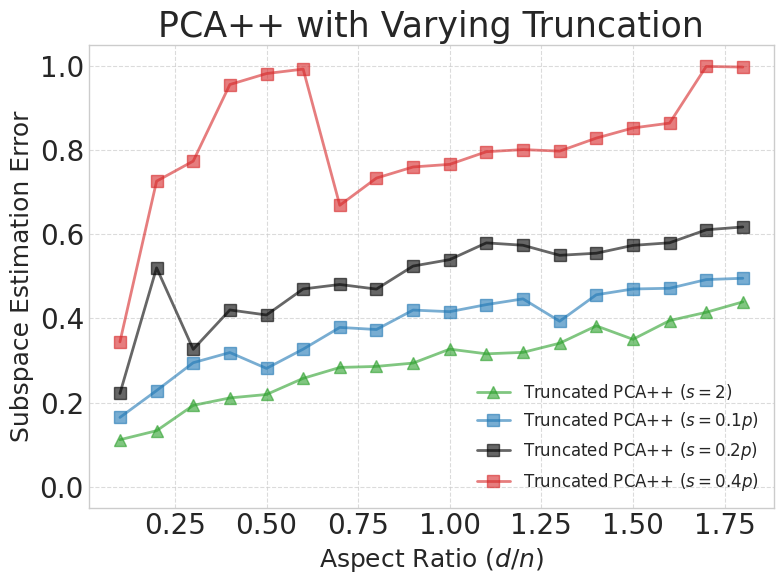

In [ ]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "legend.fontsize": 12,
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()

# Plot "Generalized eigenvalue (Top 2) solution"
ax.plot(asp_ratio, [res_2[i][0] for i in range(len(res_2))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label=r'Truncated PCA++ ($s=2$)', alpha=0.6)

# Plot "Generalized eigenvalue (Top 2) solution"
ax.plot(asp_ratio, [res_2[i][1] for i in range(len(res_2))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label=r'Truncated PCA++ ($s=0.1p$)', alpha=0.6) # Or your specific method name

# Plot "Generalized eigenvalue (Top 2) solution"
ax.plot(asp_ratio, [res_2[i][2] for i in range(len(res_2))],
        marker='s',  # Square marker
        linestyle='-',
        color='k',    # A standard red
        label=r'Truncated PCA++ ($s=0.2p$)', alpha=0.6) # Or your specific method name
# Plot "Generalized eigenvalue (Top 2) solution"
ax.plot(asp_ratio, [res_2[i][3] for i in range(len(res_2))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:red',    # A standard red
        label=r'Truncated PCA++ ($s=0.4p$)', alpha=0.6) # Or your specific method name

# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Aspect Ratio ($d/n$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'PCA++ with Varying Truncation')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='best') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "Truncated_PCA++_diff_s.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()

Truncated PCA vs PCA failed

In [ ]:
n = 2000
p = 800
sbr = [1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2]
sbr = [1/(x) for x in sbr]
res_3 = [[0]*5 for _ in range(len(sbr))]
sig_lev = 10

for i in range(len(sbr)):
  sig = np.zeros(p)
  sig[0] = 1
  S, Splus, XXplus,_,_,_,_ = generate_data(p = p, n = n, sig_lev = sig_lev, bkg_lev = (sig_lev/sbr[i])**2)

  vec = np.linalg.eig(S)[1].T[0]
  vec_cl = np.linalg.eig(Splus)[1].T[0]
  vec_unif_1 = Generalized_eigenvector_topk(Splus,S).T[0]

  res_3[i][2] = np.sin(np.arccos(abs(np.corrcoef(vec, sig)[0][1])))
  res_3[i][0] = np.sin(np.arccos(abs(np.corrcoef(vec_cl, sig)[0][1])))
  res_3[i][1] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_1, sig)[0][1])))

Plot saved as PCA+_vs._PCA++.pdf


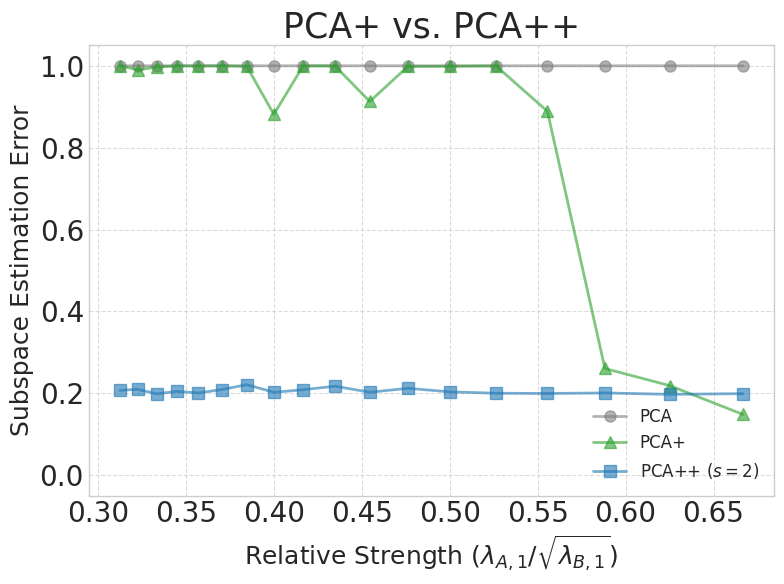

In [ ]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "legend.fontsize": 12,
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()


# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(sbr, [res_3[i][2] for i in range(len(res_3))],
        marker='o',  # Square marker
        linestyle='-',
        color='tab:gray',    # A standard red
        label=r'PCA', alpha=0.6) # Or your specific method name


# Plot "Generalized eigenvalue solution" (Standard GES)
ax.plot(sbr, [res_3[i][0] for i in range(len(res_3))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label=r'PCA+', alpha=0.6)

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(sbr, [res_3[i][1] for i in range(len(res_3))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label=r'PCA++ ($s=2$)', alpha=0.6) # Or your specific method name

# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Relative Strength ($\lambda_{A,1}/\sqrt{\lambda_{B,1}}$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'PCA+ vs. PCA++')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='lower right') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "PCA+_vs._PCA++.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()

In [ ]:
n = 500

asp_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
res_4 = [[0]*5 for _ in range(len(asp_ratio))]
sig_lev = 10

for i in range(len(asp_ratio)):
  p = int(asp_ratio[i]*n)
  sig = np.zeros(p)
  sig[0] = 1
  S, Splus, XXplus,_,_,_,_ = generate_data(p = p, n = n, sig_lev = sig_lev, bkg_lev = 500)

  vec = np.linalg.eig(S)[1].T[0]
  vec_cl = np.linalg.eig(Splus)[1].T[0]
  vec_unif_1 = Generalized_eigenvector_topk(Splus,S).T[0]

  res_4[i][2] = np.sin(np.arccos(abs(np.corrcoef(vec, sig)[0][1])))
  res_4[i][0] = np.sin(np.arccos(abs(np.corrcoef(vec_cl, sig)[0][1])))
  res_4[i][1] = np.sin(np.arccos(abs(np.corrcoef(vec_unif_1, sig)[0][1])))

Plot saved as PCA+_vs._PCA++_asp.pdf


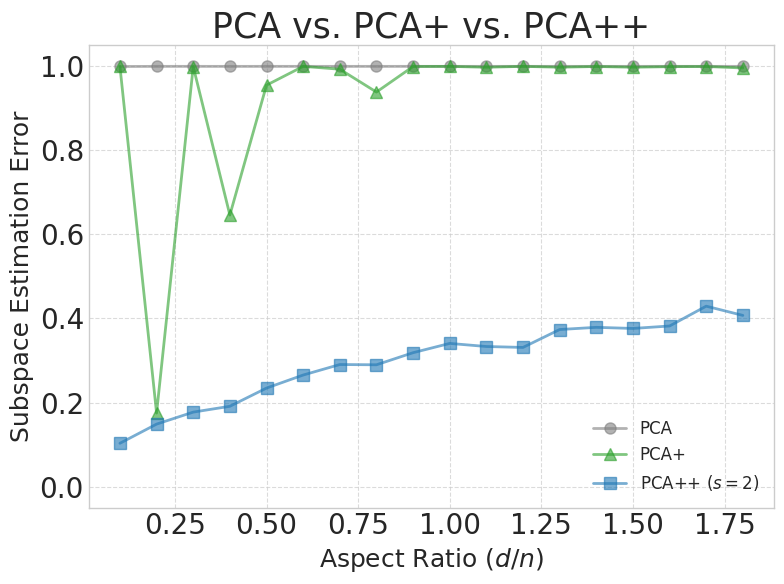

In [ ]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "legend.fontsize": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()


# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res_4[i][2] for i in range(len(res_4))],
        marker='o',  # Square marker
        linestyle='-',
        color='tab:gray',    # A standard red
        label=r'PCA', alpha=0.6) # Or your specific method name


# Plot "Generalized eigenvalue solution" (Standard GES)
ax.plot(asp_ratio, [res_4[i][0] for i in range(len(res_4))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label=r'PCA+', alpha=0.6)

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res_4[i][1] for i in range(len(res_4))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label=r'PCA++ ($s=2$)', alpha=0.6) # Or your specific method name



# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Aspect Ratio ($d/n$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'PCA vs. PCA+ vs. PCA++')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='lower right') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "PCA+_vs._PCA++_asp.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()